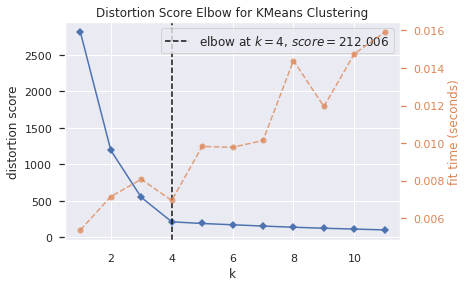

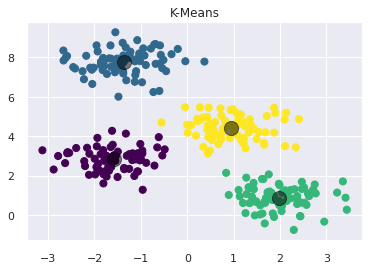

Accuracy is 1.0


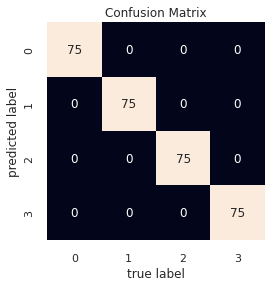

In [35]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import mode
import numpy as np

 

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

 

#Determining the best k for k-means
for k in range(1,12):
    model = KMeans(n_clusters=k, n_init = 10)
    model.fit(X, y_true)

 

 

visualizer = KElbowVisualizer(model, k=(1,12))

 

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

 

 

#K-means for best k-model from KElbowVisualizer
bestKmodel = KMeans(n_clusters = visualizer.elbow_value_, n_init = 10)

 

# inputs of fit function X, without y, 
# because K-means is unsupervised learning
bestKmodel.fit(X)
y_bestKmodel = bestKmodel.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_bestKmodel, s=50, cmap='viridis')

 

# predicted centroids
centers = bestKmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means')
plt.show()

labels = np.zeros_like(y_bestKmodel)
for i in range(4):
    mask = (y_bestKmodel == i)
    labels[mask] = mode(y_true[mask])[0]

accuracy = accuracy_score(y_true,labels)

print('Accuracy is ' + str(accuracy))
 
mat = confusion_matrix(labels, y_true)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()